<a href="https://colab.research.google.com/github/aaghouse/Cybersecurity_ML/blob/main/cool_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Descriptioin:** Cybersecurity scanning and detection often involves capturing network packets using industry standard sniffers and analyzing headers to monitor and detect threats. This project scenario involves gathering network traffic information and analyzing it to Identify threat or normal traffic. Once Identified we will then classify it into various bins to identify the type of threats. This project has two parts ( Part I & II), in total 4 files.

**Part I** EDA ( Exploratory Data Analysis), model experimentation, choosing the right model, tuning and then perform binary classification.

**File 1:** cyber_ml_capstone.ipynb
**File 2:** optimized_model.ipynb
**File 3:** cool_plots.ipynb
**Part II** Leverage Neural Networks, evaluate various models, choose the right model, fine tune it and perform multiclass classification.

**File 4:** neural_net_multi_class_classification.ipynb

**Part I This is File 3 of 4: cool_plots.ipynb**

EDA part of the input data remains the same. This file generates geo location of the source and destination packets.

In [ ]:
!pip install maxminddb
import maxminddb
import pandas as pd
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
network = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/capstone/capstone-dataset/Train_Test_Network.csv')
network.tail()



# This code reviews the input source and destination IP's and maps it to the respective region where it originated or destined
# Eventually used to display as graph. This is to review any suspitious countries intrution right off the EDA phase to flag as
# a security threat. Example of these red flag regions could include black listed countries for unknown/unwarrented traffic.


mmdb_file_path = '/content/drive/My Drive/Colab Notebooks/AIML/capstone/capstone-dataset/GeoLite2-Country.mmdb'

# Open the MMDB file
with maxminddb.open_database(mmdb_file_path) as reader:
    # Load your DataFrame or create one with IP addresses
    # For example, let's assume you have a DataFrame with an 'ip_address' column
    # df = pd.read_csv('your_data.csv')

    # Function to perform IP address lookup and return location information
    def ip_to_location(ip):
        try:
            result = reader.get(ip)
            if result:
                return {
                    'country': result.get('country', {}).get('iso_code')#, 'N/A')
                    #'country': result.get('country', {}).get('iso_code', 'N/A')#,
                    #'city': result.get('city', {}).get('names', {}).get('en', 'N/A'),
                    #'latitude': result.get('location', {}).get('latitude', 'N/A'),
                    #'longitude': result.get('location', {}).get('longitude', 'N/A')
                }
            else:
                return {'country': 'N/A'}#, 'city': 'N/A', 'latitude': 'N/A', 'longitude': 'N/A'}
        except Exception as e:
            return {'country': 'N/A'}#, 'city': 'N/A', 'latitude': 'N/A', 'longitude': 'N/A'}

    # Apply the 'ip_to_location' function to the DataFrame to create new columns
    network['src_country'] = network['src_ip'].apply(ip_to_location)
    network['dst_country'] = network['dst_ip'].apply(ip_to_location)
#print(network['src_country'])

network['src_country'] = network['src_country'].apply(lambda x: x.get('country', 'N/A'))
network['dst_country'] = network['dst_country'].apply(lambda x: x.get('country', 'N/A'))

Mounted at /content/drive


In [ ]:
import numpy as np
srccounts_df = network['src_country'].value_counts().reset_index()
srccounts_df.columns = ['src_country', 'counts']
srccounts_df['src_country'].replace('N/A', np.nan, inplace=True)
srccounts_df.dropna(subset=['src_country'], inplace=True)
print(srccounts_df.shape)
srccounts_df.head()


(141, 2)


,src_country,counts
1,US,4124
2,AU,3225
3,CN,977
4,JP,469
5,KR,325


In [ ]:

dstcounts_df = network['dst_country'].value_counts().reset_index()
dstcounts_df.columns = ['dst_country', 'counts']
dstcounts_df['dst_country'].replace('N/A', np.nan, inplace=True)
dstcounts_df.dropna(subset=['dst_country'], inplace=True)
print(dstcounts_df.shape)
dstcounts_df.head()

(92, 2)


,dst_country,counts
1,US,43181
2,DE,13645
3,AU,11010
4,FR,9710
5,NL,3559


In [ ]:
#Dictionary to convert  Country code with two letters to three.
#Source https://stackoverflow.com/questions/16253060/how-to-convert-country-names-to-iso-3166-1-alpha-2-values-using-python

convert_ISO_3166_2_to_1 = {
'AF':'AFG',
'AX':'ALA',
'AL':'ALB',
'DZ':'DZA',
'AS':'ASM',
'AD':'AND',
'AO':'AGO',
'AI':'AIA',
'AQ':'ATA',
'AG':'ATG',
'AR':'ARG',
'AM':'ARM',
'AW':'ABW',
'AU':'AUS',
'AT':'AUT',
'AZ':'AZE',
'BS':'BHS',
'BH':'BHR',
'BD':'BGD',
'BB':'BRB',
'BY':'BLR',
'BE':'BEL',
'BZ':'BLZ',
'BJ':'BEN',
'BM':'BMU',
'BT':'BTN',
'BO':'BOL',
'BA':'BIH',
'BW':'BWA',
'BV':'BVT',
'BR':'BRA',
'IO':'IOT',
'BN':'BRN',
'BG':'BGR',
'BF':'BFA',
'BI':'BDI',
'KH':'KHM',
'CM':'CMR',
'CA':'CAN',
'CV':'CPV',
'KY':'CYM',
'CF':'CAF',
'TD':'TCD',
'CL':'CHL',
'CN':'CHN',
'CX':'CXR',
'CC':'CCK',
'CO':'COL',
'KM':'COM',
'CG':'COG',
'CD':'COD',
'CK':'COK',
'CR':'CRI',
'CI':'CIV',
'HR':'HRV',
'CU':'CUB',
'CY':'CYP',
'CZ':'CZE',
'DK':'DNK',
'DJ':'DJI',
'DM':'DMA',
'DO':'DOM',
'EC':'ECU',
'EG':'EGY',
'SV':'SLV',
'GQ':'GNQ',
'ER':'ERI',
'EE':'EST',
'ET':'ETH',
'FK':'FLK',
'FO':'FRO',
'FJ':'FJI',
'FI':'FIN',
'FR':'FRA',
'GF':'GUF',
'PF':'PYF',
'TF':'ATF',
'GA':'GAB',
'GM':'GMB',
'GE':'GEO',
'DE':'DEU',
'GH':'GHA',
'GI':'GIB',
'GR':'GRC',
'GL':'GRL',
'GD':'GRD',
'GP':'GLP',
'GU':'GUM',
'GT':'GTM',
'GG':'GGY',
'GN':'GIN',
'GW':'GNB',
'GY':'GUY',
'HT':'HTI',
'HM':'HMD',
'VA':'VAT',
'HN':'HND',
'HK':'HKG',
'HU':'HUN',
'IS':'ISL',
'IN':'IND',
'ID':'IDN',
'IR':'IRN',
'IQ':'IRQ',
'IE':'IRL',
'IM':'IMN',
'IL':'ISR',
'IT':'ITA',
'JM':'JAM',
'JP':'JPN',
'JE':'JEY',
'JO':'JOR',
'KZ':'KAZ',
'KE':'KEN',
'KI':'KIR',
'KP':'PRK',
'KR':'KOR',
'KW':'KWT',
'KG':'KGZ',
'LA':'LAO',
'LV':'LVA',
'LB':'LBN',
'LS':'LSO',
'LR':'LBR',
'LY':'LBY',
'LI':'LIE',
'LT':'LTU',
'LU':'LUX',
'MO':'MAC',
'MK':'MKD',
'MG':'MDG',
'MW':'MWI',
'MY':'MYS',
'MV':'MDV',
'ML':'MLI',
'MT':'MLT',
'MH':'MHL',
'MQ':'MTQ',
'MR':'MRT',
'MU':'MUS',
'YT':'MYT',
'MX':'MEX',
'FM':'FSM',
'MD':'MDA',
'MC':'MCO',
'MN':'MNG',
'ME':'MNE',
'MS':'MSR',
'MA':'MAR',
'MZ':'MOZ',
'MM':'MMR',
'NA':'NAM',
'NR':'NRU',
'NP':'NPL',
'NL':'NLD',
'AN':'ANT',
'NC':'NCL',
'NZ':'NZL',
'NI':'NIC',
'NE':'NER',
'NG':'NGA',
'NU':'NIU',
'NF':'NFK',
'MP':'MNP',
'NO':'NOR',
'OM':'OMN',
'PK':'PAK',
'PW':'PLW',
'PS':'PSE',
'PA':'PAN',
'PG':'PNG',
'PY':'PRY',
'PE':'PER',
'PH':'PHL',
'PN':'PCN',
'PL':'POL',
'PT':'PRT',
'PR':'PRI',
'QA':'QAT',
'RE':'REU',
'RO':'ROU',
'RU':'RUS',
'RW':'RWA',
'BL':'BLM',
'SH':'SHN',
'KN':'KNA',
'LC':'LCA',
'MF':'MAF',
'PM':'SPM',
'VC':'VCT',
'WS':'WSM',
'SM':'SMR',
'ST':'STP',
'SA':'SAU',
'SN':'SEN',
'RS':'SRB',
'SC':'SYC',
'SL':'SLE',
'SG':'SGP',
'SK':'SVK',
'SI':'SVN',
'SB':'SLB',
'SO':'SOM',
'ZA':'ZAF',
'GS':'SGS',
'ES':'ESP',
'LK':'LKA',
'SD':'SDN',
'SR':'SUR',
'SJ':'SJM',
'SZ':'SWZ',
'SE':'SWE',
'CH':'CHE',
'SY':'SYR',
'TW':'TWN',
'TJ':'TJK',
'TZ':'TZA',
'TH':'THA',
'TL':'TLS',
'TG':'TGO',
'TK':'TKL',
'TO':'TON',
'TT':'TTO',
'TN':'TUN',
'TR':'TUR',
'TM':'TKM',
'TC':'TCA',
'TV':'TUV',
'UG':'UGA',
'UA':'UKR',
'AE':'ARE',
'GB':'GBR',
'US':'USA',
'UM':'UMI',
'UY':'URY',
'UZ':'UZB',
'VU':'VUT',
'VE':'VEN',
'VN':'VNM',
'VG':'VGB',
'VI':'VIR',
'WF':'WLF',
'EH':'ESH',
'YE':'YEM',
'ZM':'ZMB',
'ZW':'ZWE'
}

def convert_to_three_letter(df, col_name):
    df[col_name + 'three'] = df[col_name].map(convert_ISO_3166_2_to_1)
    return df
src3_df = convert_to_three_letter(srccounts_df, 'src_country')
src3_df.head()

def convert_to_three_letter(df, col_name):
    df[col_name + 'three'] = df[col_name].map(convert_ISO_3166_2_to_1)
    return df
dst3_df = convert_to_three_letter(dstcounts_df, 'dst_country')
dst3_df.head()

,dst_country,counts,dst_countrythree
1,US,43181,USA
2,DE,13645,DEU
3,AU,11010,AUS
4,FR,9710,FRA
5,NL,3559,NLD


<ipython-input-58-8a4121f66c31>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


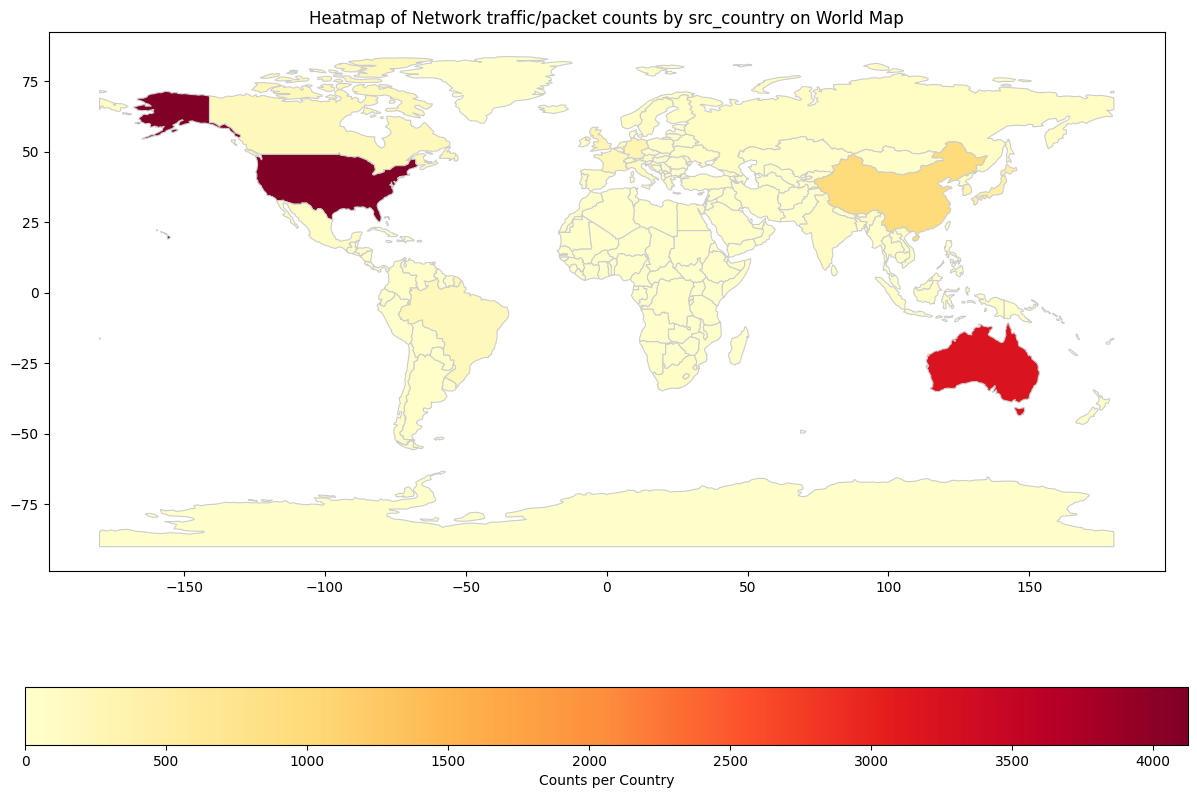

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load world map GeoJSON file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map with the DataFrame based on country codes (src_country)
world = world.merge(src3_df, how='left', left_on='iso_a3', right_on='src_countrythree')

# Fill NaN values (countries without counts) with 0
world['counts'].fillna(0, inplace=True)

# Plotting the world map with country counts as shades
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='counts', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
           legend_kwds={'label': "Counts per Country", 'orientation': "horizontal"})

plt.title('Heatmap of Network traffic/packet counts by src_country on World Map')
plt.show()

<ipython-input-52-1a6e5e88d4ea>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


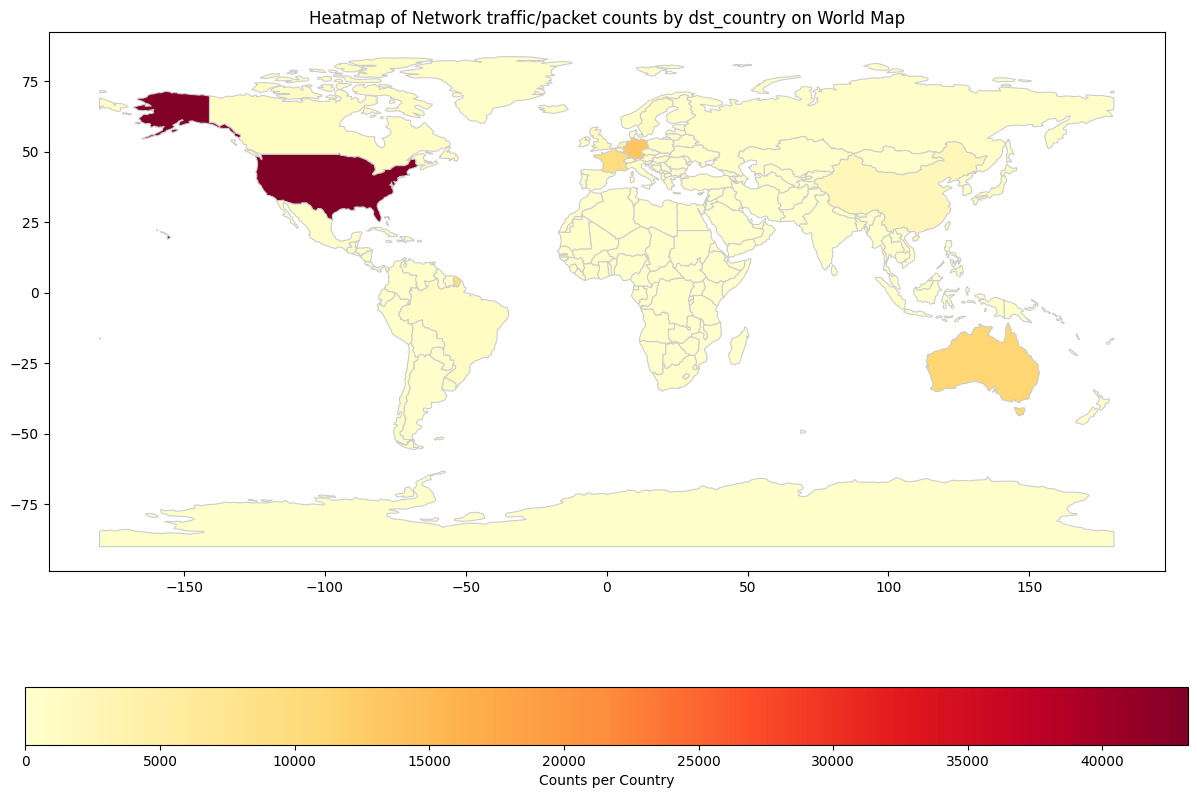

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load world map GeoJSON file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map with the DataFrame based on country codes (src_country)
world = world.merge(dst3_df, how='left', left_on='iso_a3', right_on='dst_countrythree')

# Fill NaN values (countries without counts) with 0
world['counts'].fillna(0, inplace=True)

# Plotting the world map with country counts as shades
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='counts', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
           legend_kwds={'label': "Counts per Country", 'orientation': "horizontal"})

plt.title('Heatmap of Network traffic/packet counts by dst_country on World Map')
plt.show()